In [57]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [58]:
dff = pd.read_csv('/home/jupyter-a.solovev-15/project_statist_2/hw_aa.csv', sep=';')
dff

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [59]:
dff.dtypes

Unnamed: 0            int64
uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [60]:
dff.isna().sum()

Unnamed: 0           0
uid                  0
experimentVariant    0
version              0
purchase             0
dtype: int64

In [61]:
ctr_full= dff[dff.purchase == 1].shape[0]/dff.shape[0]
ctr_full*100

3.8687430128013354

In [62]:
dff.version.value_counts()

v2.8.0      82835
v2.9.0      23954
v3.8.0.0    11804
v3.7.4.0     8425
Name: version, dtype: int64

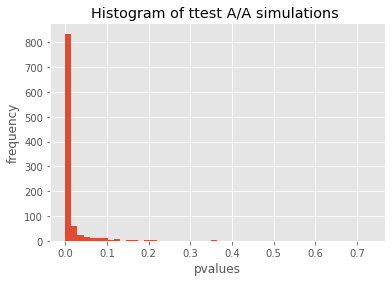

0.929

In [42]:
get_aatest(q1,q0) # АА-тест для всех пользователей ## функция внизу страницы

На уровне альфа = 0.05 FPR = 0.929. Так как FPR > альфа следует, что по результатам т-теста выборки отличаются, следует сплит-система сломана.

In [51]:
dff.groupby(['version', 'experimentVariant'], as_index=False).agg({'purchase': 'mean'}) # CTR по группам в зависимости от версии

,version,experimentVariant,purchase
0,v2.8.0,0,0.000993
1,v2.8.0,1,0.045606
2,v2.9.0,0,0.074658
3,v2.9.0,1,0.071304
4,v3.7.4.0,0,0.059943
5,v3.7.4.0,1,0.063018
6,v3.8.0.0,0,0.057604
7,v3.8.0.0,1,0.062848


При сравнении CTR по каждой версии приложения, сразу видно, что с версией v2.8.0, что-то странное, так как для experimentVariant = 0 CTR очень маленький, по сравнению с другими версиями             
Также подозрение вызывает v2.9.0, так как для всех остальных версий в группе 1 CTR больше, чем в группе 0 (но в принципе, если это АА-тест, и изменений никаких не было, то это нормально)

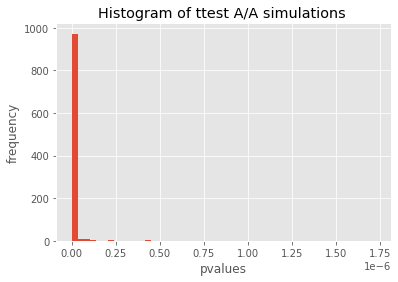

1.0

In [52]:
get_aatest(t1,t0) # AA-test для v2.8.0

Система сплитования для данной версии приложения сломана                                                                      
Также проведем АА-тест для других версий приложения, у нас не так много групп, поэтому можем так сделать

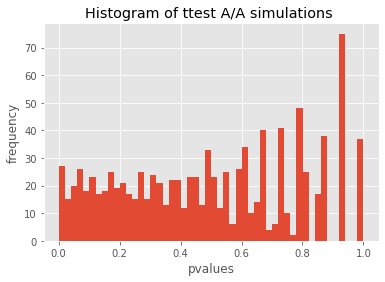

0.054

In [81]:
get_aatest(r1,r0) # AA-test для v2.9.0

На уровне альфа = 0.05 FPR = 0.052 (при множественном запуске я получал значения в интерсвале 0.4-0.6). FPR находится на границе с  альфа следует можно принять, что система сплитования работает

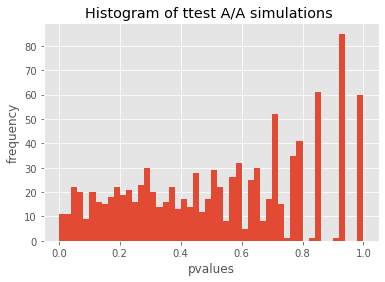

0.03

In [82]:
get_aatest(w1,w0) # AA-test для v3.7.4.0

Система сплитования для v3.7.4.0 работает

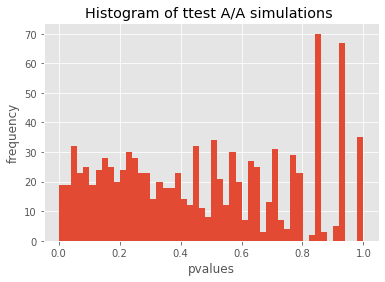

0.052

In [93]:
get_aatest(e0,e1) # AA-test для v3.8.0.0

На уровне альфа = 0.05 FPR = 0.052. FPR находится на границе с альфа следует можно принять, что система сплитования работает

Система сплитования не работает для версии приложения v2.8.0. Исключим из наших данных данную версию, и проверим систему сплитования на группах, включая оставшиеся версии
Для остальных версий FPR находится на уровне значимости. Если при исключении v2.8.0 система сплитования также не будет работать, то возможно стоит для проверки уменьшить альфа, либо смотреть другие составляющие (тип устройство, гео и т.д.).

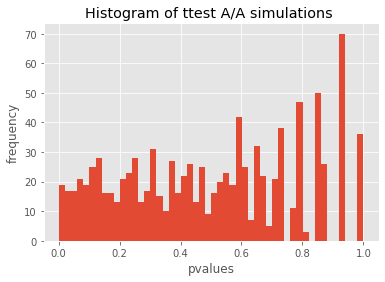

0.044

In [100]:
get_aatest(u1,u0) # AA-test по группам без v2.8.0

На уровне альфа = 0.05 FPR = 0.044. Так как FPR < альфа следует, что сплит-система работает.

In [95]:
q0 = dff[dff.experimentVariant == 0].purchase
q1 = dff[dff.experimentVariant == 1].purchase

In [64]:
w0 = dff[(dff.version == 'v3.7.4.0') & (dff.experimentVariant == 0)].purchase
w1 = dff[(dff.version == 'v3.7.4.0') & (dff.experimentVariant == 1)].purchase

In [65]:
e0 = dff[(dff.version == 'v3.8.0.0') & (dff.experimentVariant == 0)].purchase
e1 = dff[(dff.version == 'v3.8.0.0') & (dff.experimentVariant == 1)].purchase

In [66]:
r0 = dff[(dff.version == 'v2.9.0') & (dff.experimentVariant == 0)].purchase
r1 = dff[(dff.version == 'v2.9.0') & (dff.experimentVariant == 1)].purchase

In [67]:
t0 = dff[(dff.version == 'v2.8.0') & (dff.experimentVariant == 0)].purchase
t1 = dff[(dff.version == 'v2.8.0') & (dff.experimentVariant == 1)].purchase

In [68]:
u0 = dff[(dff.version != 'v2.8.0') & (dff.experimentVariant == 0)].purchase
u1 = dff[(dff.version != 'v2.8.0') & (dff.experimentVariant == 1)].purchase

In [76]:
def get_aatest(
    data_column_1,
    data_column_2,
    simulations = 1000,
    n_s = 1000
):  
    res = []
    for i in tqdm(range(simulations)):
        
        s1 = data_column_1.sample(n_s, replace = False).values
        s2 = data_column_2.sample(n_s, replace = False).values
        res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue
    plt.hist(res, bins = 50)
    plt.style.use('ggplot')
    plt.xlabel('pvalues')
    plt.ylabel('frequency')
    plt.title("Histogram of ttest A/A simulations ")
    plt.show()
    v = sum(np.array(res) <0.05) / simulations
    
    return v 